In [ ]:
import pandas as pd

df = pd.read_csv("weather_data_1hr.csv")

In [ ]:
!pip3 install torch

In [ ]:
df

,loc_id,date,time,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,1,2019-06-01,0,no,16,61,6,10,228,SW,...,16,61,12,54,16,61,7,12,16,61
1,1,2019-06-01,100,no,16,60,6,9,230,SW,...,16,60,12,53,16,60,7,11,16,60
2,1,2019-06-01,200,no,15,59,5,9,233,SW,...,15,59,11,53,15,59,6,10,15,59
3,1,2019-06-01,300,no,15,58,5,8,235,SW,...,15,58,11,52,14,58,6,9,14,58
4,1,2019-06-01,400,no,15,59,4,7,229,SW,...,15,59,11,52,15,59,5,8,15,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1,2019-07-31,1900,no,20,68,11,18,260,W,...,20,68,8,47,20,68,14,23,20,68
1460,1,2019-07-31,2000,no,20,67,11,17,258,WSW,...,20,67,9,48,20,67,14,22,20,67
1461,1,2019-07-31,2100,no,19,66,10,15,257,WSW,...,19,66,10,49,19,66,13,22,19,66
1462,1,2019-07-31,2200,no,18,65,9,15,258,WSW,...,18,65,10,50,18,65,12,20,18,65


In [ ]:
df.columns

Index(['loc_id', 'date', 'time', 'isdaytime', 'tempC', 'tempF',
       'windspeedMiles', 'windspeedKmph', 'winddirdegree', 'winddir16point',
       'weatherCode', 'weatherIconUrl', 'weatherDesc', 'precipMM',
       'precipInches', 'humidity', 'visibilityKm', 'visibilityMiles',
       'pressureMB', 'pressureInches', 'cloudcover', 'HeatIndexC',
       'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF',
       'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF'],
      dtype='object')

In [ ]:
df = df.drop(["loc_id","time","date"], axis=1)


In [ ]:
def is_numeric(col):
    try:
      # df_min_max_scaled = df_min_max_scaled.drop(["date", "time"], axis=1)
      pd.to_numeric(col)
      return True
    except:
        return False

In [ ]:
#Find all the numerical columns
numeric_columns = []
for column in df.columns:
  if(is_numeric(df[column])):
    numeric_columns.append(column)

In [ ]:
print(numeric_columns)

['tempC', 'tempF', 'windspeedMiles', 'windspeedKmph', 'winddirdegree', 'weatherCode', 'precipMM', 'precipInches', 'humidity', 'visibilityKm', 'visibilityMiles', 'pressureMB', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF']


In [ ]:
#normalization of nuerical data i.e between 0 and 1
#MinMax Scaling for all umeric colums
#MinMAx scaling allows us to get information about the significance of each entry in a column
df_min_max_scaled = df.copy()
for numeric_column in numeric_columns:
  df_min_max_scaled[numeric_column] = (df_min_max_scaled[numeric_column] - df_min_max_scaled[numeric_column].min()) / (df_min_max_scaled[numeric_column].max() - df_min_max_scaled[numeric_column].min())

In [ ]:
df_min_max_scaled.head()
# We do ot need the location id at this point

,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,no,0.366667,0.370370,0.285714,0.28125,0.640227,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.255319,0.5000,0.500000,0.366667,0.370370,0.21875,0.22,0.354839,0.363636
1,no,0.366667,0.351852,0.285714,0.25000,0.645892,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.234043,0.5000,0.464286,0.366667,0.351852,0.21875,0.20,0.354839,0.345455
2,no,0.333333,0.333333,0.238095,0.25000,0.654391,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.464286,0.333333,0.333333,0.18750,0.18,0.322581,0.327273
3,no,0.333333,0.314815,0.238095,0.21875,0.660057,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.191489,0.4375,0.428571,0.300000,0.314815,0.18750,0.16,0.290323,0.309091
4,no,0.333333,0.333333,0.190476,0.18750,0.643059,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.428571,0.333333,0.333333,0.15625,0.14,0.322581,0.327273


In [ ]:
#Total number of unique values in a column
value_counts = []
value_counts_dict = {}
for column in numeric_columns:
  value_counts_dict[column] = len(set(df_min_max_scaled[column]))
  value_counts.append(len(set(df_min_max_scaled[column])))

print(value_counts_dict)

{'tempC': 30, 'tempF': 48, 'windspeedMiles': 22, 'windspeedKmph': 33, 'winddirdegree': 326, 'weatherCode': 15, 'precipMM': 35, 'precipInches': 5, 'humidity': 66, 'visibilityKm': 19, 'visibilityMiles': 12, 'pressureMB': 34, 'pressureInches': 2, 'cloudcover': 101, 'HeatIndexC': 28, 'HeatIndexF': 45, 'DewPointC': 17, 'DewPointF': 29, 'WindChillC': 30, 'WindChillF': 51, 'WindGustMiles': 32, 'WindGustKmph': 47, 'FeelsLikeC': 31, 'FeelsLikeF': 50}


In [ ]:
value_sigificance = []
for value in value_counts:
  value_sigificance.append(value/sum(value_counts))

In [ ]:
#Minmax normalization of column unique value count
# this will enable us to get the significance of each individual column

import numpy as np

data = np.array(value_sigificance)
normalizedData = (data-np.min(data))/(np.max(data)-np.min(data))
print(normalizedData)

[0.08641975 0.14197531 0.0617284  0.09567901 1.         0.04012346
 0.10185185 0.00925926 0.19753086 0.05246914 0.0308642  0.09876543
 0.         0.30555556 0.08024691 0.13271605 0.0462963  0.08333333
 0.08641975 0.15123457 0.09259259 0.13888889 0.08950617 0.14814815]


In [ ]:
df_min_max_scaled

,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,no,0.366667,0.370370,0.285714,0.28125,0.640227,SW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.255319,0.5000,0.500000,0.366667,0.370370,0.21875,0.22,0.354839,0.363636
1,no,0.366667,0.351852,0.285714,0.25000,0.645892,SW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.234043,0.5000,0.464286,0.366667,0.351852,0.21875,0.20,0.354839,0.345455
2,no,0.333333,0.333333,0.238095,0.25000,0.654391,SW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.464286,0.333333,0.333333,0.18750,0.18,0.322581,0.327273
3,no,0.333333,0.314815,0.238095,0.21875,0.660057,SW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.191489,0.4375,0.428571,0.300000,0.314815,0.18750,0.16,0.290323,0.309091
4,no,0.333333,0.333333,0.190476,0.18750,0.643059,SW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.428571,0.333333,0.333333,0.15625,0.14,0.322581,0.327273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,no,0.500000,0.500000,0.523810,0.53125,0.730878,W,0.228261,https://cdn.worldweatheronline.net/images/wsym...,Patchy rain possible,...,0.407407,0.404255,0.2500,0.250000,0.500000,0.500000,0.43750,0.44,0.483871,0.490909
1460,no,0.500000,0.481481,0.523810,0.50000,0.725212,WSW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.407407,0.382979,0.3125,0.285714,0.500000,0.481481,0.43750,0.42,0.483871,0.472727
1461,no,0.466667,0.462963,0.476190,0.43750,0.722380,WSW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.370370,0.361702,0.3750,0.321429,0.466667,0.462963,0.40625,0.42,0.451613,0.454545
1462,no,0.433333,0.444444,0.428571,0.43750,0.725212,WSW,0.010870,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.333333,0.340426,0.3750,0.357143,0.433333,0.444444,0.37500,0.38,0.419355,0.436364


In [ ]:
column_significance = {}

for i in range(len(normalizedData)):
  column_significance[numeric_columns[i]] = normalizedData[i]

column_significance

{'tempC': 0.08641975308641975,
 'tempF': 0.1419753086419753,
 'windspeedMiles': 0.0617283950617284,
 'windspeedKmph': 0.09567901234567901,
 'winddirdegree': 1.0,
 'weatherCode': 0.04012345679012346,
 'precipMM': 0.10185185185185185,
 'precipInches': 0.009259259259259259,
 'humidity': 0.19753086419753088,
 'visibilityKm': 0.05246913580246914,
 'visibilityMiles': 0.0308641975308642,
 'pressureMB': 0.09876543209876543,
 'pressureInches': 0.0,
 'cloudcover': 0.3055555555555556,
 'HeatIndexC': 0.08024691358024691,
 'HeatIndexF': 0.13271604938271606,
 'DewPointC': 0.046296296296296294,
 'DewPointF': 0.08333333333333333,
 'WindChillC': 0.08641975308641975,
 'WindChillF': 0.15123456790123457,
 'WindGustMiles': 0.09259259259259259,
 'WindGustKmph': 0.1388888888888889,
 'FeelsLikeC': 0.08950617283950617,
 'FeelsLikeF': 0.14814814814814817}

In [ ]:
def get_entry_significance(parent_col, entry):
  if(str(entry) == 'nan'):
    return 0
  all_entries = len(df_min_max_scaled[parent_col])
  items = df_min_max_scaled[parent_col].value_counts()[entry]
  return items/all_entries


In [ ]:
#GET sigificace of each etry in the 'table'
#We repeat the same techniques we used for the columns
# entry_significance = {}
# entry_significance_list = []
# for column in numeric_columns:
#   items = df_min_max_scaled[column]
#   respective = []
#   for item in items:
#     respective.append(get_entry_significance(column,item))
#   entry_significance_list.append(respective)
#   entry_significance[column] = respective

In [ ]:
# for column in numeric_columns:
#   df_min_max_scaled[column] = entry_significance[column]

In [ ]:
df_min_max_scaled.head()
#Unscaled significance values

,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,no,0.366667,0.370370,0.285714,0.28125,0.640227,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.255319,0.5000,0.500000,0.366667,0.370370,0.21875,0.22,0.354839,0.363636
1,no,0.366667,0.351852,0.285714,0.25000,0.645892,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.234043,0.5000,0.464286,0.366667,0.351852,0.21875,0.20,0.354839,0.345455
2,no,0.333333,0.333333,0.238095,0.25000,0.654391,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.464286,0.333333,0.333333,0.18750,0.18,0.322581,0.327273
3,no,0.333333,0.314815,0.238095,0.21875,0.660057,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.191489,0.4375,0.428571,0.300000,0.314815,0.18750,0.16,0.290323,0.309091
4,no,0.333333,0.333333,0.190476,0.18750,0.643059,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.428571,0.333333,0.333333,0.15625,0.14,0.322581,0.327273


In [ ]:
#Normalize values to be between 0 and 1
for numeric_column in numeric_columns:
  df_min_max_scaled[numeric_column] = (df_min_max_scaled[numeric_column] - df_min_max_scaled[numeric_column].min()) / (df_min_max_scaled[numeric_column].max() - df_min_max_scaled[numeric_column].min())

In [ ]:
#now we have a table populated with significance values that have een scaled to be between 0 and 1
df_min_max_scaled.head()

,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,no,0.366667,0.370370,0.285714,0.28125,0.640227,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.255319,0.5000,0.500000,0.366667,0.370370,0.21875,0.22,0.354839,0.363636
1,no,0.366667,0.351852,0.285714,0.25000,0.645892,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.234043,0.5000,0.464286,0.366667,0.351852,0.21875,0.20,0.354839,0.345455
2,no,0.333333,0.333333,0.238095,0.25000,0.654391,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.464286,0.333333,0.333333,0.18750,0.18,0.322581,0.327273
3,no,0.333333,0.314815,0.238095,0.21875,0.660057,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.191489,0.4375,0.428571,0.300000,0.314815,0.18750,0.16,0.290323,0.309091
4,no,0.333333,0.333333,0.190476,0.18750,0.643059,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.428571,0.333333,0.333333,0.15625,0.14,0.322581,0.327273


In [ ]:
# df_min_max_scaled = df_min_max_scaled.drop(["date", "time"], axis=1)

In [ ]:
# #Adding the column significance to the row significance

# for column in numeric_columns:
#   df_min_max_scaled[column] = df_min_max_scaled[column] * column_significance[column]

In [ ]:
df_min_max_scaled.head(20)

,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,no,0.366667,0.370370,0.285714,0.28125,0.640227,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.255319,0.5000,0.500000,0.366667,0.370370,0.21875,0.22,0.354839,0.363636
1,no,0.366667,0.351852,0.285714,0.25000,0.645892,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.234043,0.5000,0.464286,0.366667,0.351852,0.21875,0.20,0.354839,0.345455
2,no,0.333333,0.333333,0.238095,0.25000,0.654391,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.464286,0.333333,0.333333,0.18750,0.18,0.322581,0.327273
3,no,0.333333,0.314815,0.238095,0.21875,0.660057,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.191489,0.4375,0.428571,0.300000,0.314815,0.18750,0.16,0.290323,0.309091
4,no,0.333333,0.333333,0.190476,0.18750,0.643059,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.222222,0.212766,0.4375,0.428571,0.333333,0.333333,0.15625,0.14,0.322581,0.327273
5,no,0.366667,0.370370,0.190476,0.15625,0.628895,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.259259,0.255319,0.4375,0.428571,0.366667,0.351852,0.15625,0.12,0.354839,0.345455
6,no,0.400000,0.388889,0.190476,0.15625,0.611898,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.296296,0.276596,0.4375,0.464286,0.400000,0.388889,0.12500,0.10,0.387097,0.381818
7,no,0.433333,0.425926,0.190476,0.15625,0.600567,SW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.333333,0.319149,0.4375,0.392857,0.433333,0.425926,0.12500,0.12,0.419355,0.418182
8,yes,0.466667,0.481481,0.190476,0.15625,0.592068,SSW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.370370,0.382979,0.3750,0.357143,0.466667,0.481481,0.15625,0.12,0.451613,0.472727
9,yes,0.533333,0.518519,0.190476,0.18750,0.580737,SSW,0.01087,https://cdn.worldweatheronline.net/images/wsym...,Partly cloudy,...,0.444444,0.425532,0.3750,0.321429,0.533333,0.518519,0.15625,0.14,0.516129,0.509091


In [ ]:
df_num = df_min_max_scaled[numeric_columns]
# df_num.drop(["loc_id"], axis=1)

In [ ]:
#Creates a list of all non numeric colums
non_numeric = set(df.columns).difference(set(numeric_columns))

In [ ]:
df_non_numeric = df[list(non_numeric)]

In [ ]:
df_non_numeric.head()

,weatherDesc,weatherIconUrl,isdaytime,winddir16point
0,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
1,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
2,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
3,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
4,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW


In [ ]:
df_num.head()

,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,weatherCode,precipMM,precipInches,humidity,visibilityKm,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,0.366667,0.370370,0.285714,0.28125,0.640227,0.01087,0.0,0.0,0.772727,0.444444,...,0.259259,0.255319,0.5000,0.500000,0.366667,0.370370,0.21875,0.22,0.354839,0.363636
1,0.366667,0.351852,0.285714,0.25000,0.645892,0.01087,0.0,0.0,0.787879,0.444444,...,0.259259,0.234043,0.5000,0.464286,0.366667,0.351852,0.21875,0.20,0.354839,0.345455
2,0.333333,0.333333,0.238095,0.25000,0.654391,0.01087,0.0,0.0,0.803030,0.444444,...,0.222222,0.212766,0.4375,0.464286,0.333333,0.333333,0.18750,0.18,0.322581,0.327273
3,0.333333,0.314815,0.238095,0.21875,0.660057,0.01087,0.0,0.0,0.803030,0.444444,...,0.222222,0.191489,0.4375,0.428571,0.300000,0.314815,0.18750,0.16,0.290323,0.309091
4,0.333333,0.333333,0.190476,0.18750,0.643059,0.01087,0.0,0.0,0.772727,0.444444,...,0.222222,0.212766,0.4375,0.428571,0.333333,0.333333,0.15625,0.14,0.322581,0.327273


In [ ]:
import torch
row_attention_matrices = []

for column in df_num.columns:
  Table_1 = []
  for column_2 in df_num.columns:
    c = df_num[column] * df_num[column_2]
    Table_1.append(torch.tensor(list(c)))
  row_attention_matrices.append(torch.stack(Table_1))
x = torch.stack(row_attention_matrices)
x_T = torch.transpose(x,2,0)
print(f"GENERAL SHAPE: {x_T.shape}")
print(f"SHAPE OF A SINGLE LAYER: {x_T[6].shape}")

GENERAL SHAPE: torch.Size([1464, 24, 24])
SHAPE OF A SINGLE LAYER: torch.Size([24, 24])


A major problem we face with our data is the fact that most of our data is numeric and not text. All the systems that summarization system used, are specifically made for text data. This means that we have somehow have to make our numeric data behave like text so that we can summarize it. Upto this point, we have been working to make our numeric data behave like text data. And now we have finally reached the last part of the process. From the above output, you can see that there are 61  30x30 matrices. Each 30x30 matrix is a result of us calculating the signnificance of our numeric columns against themselves. 1464 is the number of rows. These 30X30 matrices are important since they will help us get the embeddings for our numeric data as we pass them through an RNN model.

In [ ]:
all = df_num.values.tolist()
all_test = all[int(len(all) * 0.8):]
all = all[:int(len(all) * 0.8)]
print(all[0])

[0.36666666666666664, 0.37037037037037035, 0.2857142857142857, 0.28125, 0.6402266288951841, 0.010869565217391304, 0.0, 0.0, 0.7727272727272727, 0.4444444444444444, 0.45454545454545453, 0.7878787878787878, 1.0, 0.07, 0.25925925925925924, 0.2553191489361702, 0.5, 0.5, 0.36666666666666664, 0.37037037037037035, 0.21875, 0.22, 0.3548387096774194, 0.36363636363636365]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import numpy as np
from numpy.linalg import norm

def COS_SIM(A,B):
  A = np.array(A)
  B = np.array(B)
  cosine = np.dot(A,B)/(norm(A)*norm(B))
  return cosine


In [ ]:
'''Preprocessing the text part of our data'''

'Preprocessing the text part of our data'

In [ ]:
len(all)

1171

In [ ]:
#Non numeric data
df_non_numeric.head()

,weatherDesc,weatherIconUrl,isdaytime,winddir16point
0,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
1,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
2,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
3,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW
4,Partly cloudy,https://cdn.worldweatheronline.net/images/wsym...,no,SW


In [ ]:
df_non_numeric = df_non_numeric.drop(["weatherIconUrl"], axis=1)
df_non_numeric
#We droped the icon url since we do not need it for out use case

,weatherDesc,isdaytime,winddir16point
0,Partly cloudy,no,SW
1,Partly cloudy,no,SW
2,Partly cloudy,no,SW
3,Partly cloudy,no,SW
4,Partly cloudy,no,SW
...,...,...,...
1459,Patchy rain possible,no,W
1460,Partly cloudy,no,WSW
1461,Partly cloudy,no,WSW
1462,Partly cloudy,no,WSW


In [ ]:
#Get a list of words
all_words = []
for column in df_non_numeric.columns:
  column_words = set(df_non_numeric[column])
  all_words.extend(list(column_words))

print(all_words)

['Overcast', 'Heavy rain', 'Patchy rain possible', 'Moderate rain at times', 'Light rain', 'Patchy light rain', 'Sunny', 'Moderate or heavy rain shower', 'Light rain shower', 'Moderate or heavy rain with thunder', 'Partly cloudy', 'Clear', 'Cloudy', 'Torrential rain shower', 'Moderate rain', 'Light drizzle', 'no', 'yes', 'S', 'NW', 'SSE', 'SW', 'SSW', 'W', 'ESE', 'WSW', 'SE', 'E', 'NNW', 'NE', 'WNW', 'NNE', 'ENE', 'N']


In [ ]:
#Give each entry a number that will represent it
WORD_2_TOKEN = {}
TOKEN_2_WORD = {}

def Tokenize(word, i):
  WORD_2_TOKEN[word] = i
  TOKEN_2_WORD[i] = word
  return

def encode(row):
  encoded = []
  for word in row:
    encoded.append(WORD_2_TOKEN[word])
  return encoded

def decode(row_encoded):
  decoded = []
  for word in row_encoded:
    decoded.append(TOKEN_2_WORD[word])
  return decoded


In [ ]:
for i in range(len(all_words)):
  Tokenize(all_words[i], i)

In [ ]:
print(f"Encode example: {encode(['Light rain shower','Partly cloudy'])}")

Encode example: [8, 10]


In [ ]:
print(f"Decode example: {decode([29,19])}")

Decode example: ['NE', 'NW']


Now our text data is ready to be passed to a deep learning model.

During training, we will pass the numerical representation for our word through an embedding layer which will produce word embeddings. As for the part concerning numeric data, we will take our 26X26 matrix and put it through a softmax layer and then through a linear layer to obtain the embeddings for our


In [ ]:
import torch
def tensorfy(chosen_sequence):
  csq = []
  for x_seq in chosen_sequence:
    csq.append(torch.tensor(x_seq))
  return csq

In [ ]:
from random import randint

def get_sequence(SEQ_LEN):
  start_point = randint(0,( len(all) - SEQ_LEN) -1)
  chosen_sequence = all[start_point: start_point + SEQ_LEN]
  return tensorfy(chosen_sequence),chosen_sequence

def get_test_sequence(SEQ_LEN):
  start_point = randint(0,( len(all_test) - SEQ_LEN) -1)
  chosen_sequence = all_test[start_point: start_point + SEQ_LEN]
  return tensorfy(chosen_sequence),chosen_sequence

In [ ]:
def get_max_index(src_input):
  local = src_input.copy()
  local.sort()
  return local[len(local) - 2]

In [ ]:
def get_maxes(cos_sims):
  maxes = []
  for cos_sim in cos_sims:
    maxes.append(torch.tensor(get_max_index(cos_sim)))
  return torch.stack(maxes)

In [ ]:
def get_batch(Batch_Size,chunk="train"):
  Batch_Size = 32
  batch = []
  labels = []
  vanilla_batch = []
  for _ in range(Batch_Size):
    if(chunk == "train"):
      src_input, vnl_input = get_sequence(64)
    else:
      src_input, vnl_input = get_test_sequence(64)
    # labels.append(torch.tensor(get_max_index(src_input)))
    src_input = torch.stack(src_input).transpose(1,0)
    cos_sims = cosine_similarity(detensorfy(src_input))
    labels.append(get_maxes(cos_sims))
    batch.append(src_input)
    vanilla_batch.append(vnl_input)
  return torch.stack(batch),torch.stack(labels)

In [ ]:
def detensorfy(tensor_array):
  arr = []
  for tnsr in tensor_array:
    arr.append(tnsr.tolist())
  return arr

In [ ]:
import math
import torch.nn.functional as F

# Given Query, Key, Value, calculate the final weighted value
def scaled_dot_product_attention(q, k, v, mask=None, dropout=None):
    attention_scores = torch.matmul(q, k.transpose(-2, -1))/math.sqrt(q.shape[-1])
    if mask is not None:
        attention_scores = attention_scores.masked_fill(mask == 0, value=-1e9)

    # Softmax along the last dimension
    attention_weights = F.softmax(attention_scores, dim=-1)

    if dropout is not None:
        attention_weights = dropout(attention_weights)

    output = torch.matmul(attention_weights, v)
    return output

In [ ]:
class MultiHeadAttention(torch.nn.Module):
    def __init__(self, n_heads, d_model, dropout=0.1):
        super().__init__()

        self.n_heads = n_heads
        self.d_model = d_model
        self.d_k = self.d_k = self.d_v = d_model//n_heads

        # self attention linear layers
        # Linear layers for q, k, v vectors generation in different heads
        self.q_linear_layers = []
        self.k_linear_layers = []
        self.v_linear_layers = []
        for i in range(n_heads):

            self.q_linear_layers.append(torch.nn.Linear(d_model, self.d_k).to(device))
            self.k_linear_layers.append(torch.nn.Linear(d_model, self.d_k).to(device))
            self.v_linear_layers.append(torch.nn.Linear(d_model, self.d_v).to(device))

        self.dropout = torch.nn.Dropout(dropout)
        self.out = torch.nn.Linear(n_heads*self.d_v, d_model)

    def forward(self, q, k, v, mask=None):
        multi_head_attention_outputs = []
        for q_linear, k_linear, v_linear in zip(self.q_linear_layers,
                                                self.k_linear_layers,
                                                self.v_linear_layers):
            new_q = q_linear(q)
            new_k = k_linear(k)
            new_v = v_linear(v)


            head_v = scaled_dot_product_attention(new_q, new_k, new_v, mask, self.dropout)  # (batch_size, seq_len, d_v)
            multi_head_attention_outputs.append(head_v)

        concat = torch.cat(multi_head_attention_outputs, -1)  # (batch_size, seq_len, n_heads*d_v)

        # Linear layer to recover to original shap
        output = self.out(concat)  # (batch_size, seq_len, d_model)

        return output


In [ ]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff=2048, dropout=0.1):
        super().__init__()

        self.linear_1 = torch.nn.Linear(d_model, d_ff)
        self.dropout = torch.nn.Dropout(dropout)
        self.linear_2 = torch.nn.Linear(d_ff, d_model)

    def forward(self, x):
        x = self.dropout(F.relu(self.linear_1(x)))
        x = self.linear_2(x)
        return x

In [ ]:
class LayerNorm(torch.nn.Module):
    def __init__(self, d_model, eps=1e-6):
        super().__init__()
        self.d_model = d_model
        self.alpha = torch.nn.Parameter(torch.ones(self.d_model))
        self.beta = torch.nn.Parameter(torch.zeros(self.d_model))
        self.eps = eps

    def forward(self, x):
        # x size: (batch_size, seq_len, d_model)
        x_hat = (x - x.mean(dim=-1, keepdim=True))/(x.std(dim=-1, keepdim=True) + self.eps)
        x_tilde = self.alpha*x_hat + self.beta
        return x_tilde

In [ ]:
class EncoderLayer(torch.nn.Module):
    def __init__(self, d_model, n_heads, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.norm_1 = LayerNorm(d_model)
        self.norm_2 = LayerNorm(d_model)
        self.multi_head_attention = MultiHeadAttention(n_heads, d_model).to(device)
        self.feed_forward = FeedForward(d_model)
        self.dropout_1 = torch.nn.Dropout(dropout).to(device)
        self.dropout_2 = torch.nn.Dropout(dropout).to(device)

    def forward(self, x, mask):
        #import pdb; pdb.set_trace()

        x = x + self.dropout_1(self.multi_head_attention(x, x, x, mask).to(device)).to(device)
        x = self.norm_1(x)
        x = x + self.dropout_2(self.feed_forward(x))
        x = self.norm_2(x)
        return x

In [ ]:
class MLP(torch.nn.Module):
  def __init__(self,d_model):
    super().__init__()
    self.linear = torch.nn.Linear(d_model,1024)
    self.linear_2 = torch.nn.Linear(1024,24)

  def forward(self, x):
    x = self.linear(x)
    x = F.relu(x)
    x = self.linear_2(x)
    return x

In [ ]:
import copy

def clone_layer(module, N):
    return torch.nn.ModuleList([copy.deepcopy(module) for i in range(N)])

In [ ]:
class Encoder(torch.nn.Module):
    def __init__(self, d_model, N, n_heads):
        super().__init__()
        self.encoder_layers = clone_layer(EncoderLayer(d_model, n_heads).to(device), N).to(device)
        self.norm = LayerNorm(d_model).to(device)
        self.MLP = MLP(64 * 24)
    def forward(self, src_embeddings, mask):
        x = src_embeddings
        for encoder in self.encoder_layers:
            x = encoder(x, mask)
        x = self.norm(x)
        x = torch.flatten(x, 1,2)
        x = self.MLP(x)
        x = F.tanh(x)
        return x

In [ ]:
d_model = 64
n_heads = 2
N = 1

In [ ]:
device = "cuda"

In [ ]:
Train_model = Encoder(d_model, N, n_heads).to(device)

In [ ]:
for p in Train_model.parameters():
    if p.dim() > 1:
        torch.nn.init.xavier_uniform(p)

<ipython-input-60-76a1a86bf4b2>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(p)


In [ ]:
optimizer = torch.optim.Adam(Train_model.parameters(),lr=1e-5)

In [ ]:
device = "cuda"

In [ ]:
criterion = torch.nn.MSELoss()

In [ ]:
train_losses = []
epochs = 100
Train_model.train()
i = 0
for e in range(epochs):
  for _ in range(40):
    batch, labels = get_batch(32, chunk="train")
    preds = Train_model(batch.to(device),None)
    optimizer.zero_grad()
    loss = criterion(preds, labels.to(device).float())
    train_losses.append(loss.item())
    loss.backward()
    optimizer.step()
    i += 1
    if(i % 10 == 0):
      print(f"[-] Train_loss is {np.mean(train_losses)} iteration is {i} on epoch {e}")
      train_losses = []
  i = 0


[-] Train_loss is 1.119097352027893 iteration is 10 on epoch 0
[-] Train_loss is 0.6860279023647309 iteration is 20 on epoch 0
[-] Train_loss is 0.4031255453824997 iteration is 30 on epoch 0
[-] Train_loss is 0.2465166300535202 iteration is 40 on epoch 0
[-] Train_loss is 0.15626951009035112 iteration is 10 on epoch 1
[-] Train_loss is 0.062099472433328626 iteration is 20 on epoch 1
[-] Train_loss is 0.04005665108561516 iteration is 30 on epoch 1
[-] Train_loss is 0.03399985171854496 iteration is 40 on epoch 1
[-] Train_loss is 0.0335144929587841 iteration is 10 on epoch 2
[-] Train_loss is 0.028689471445977686 iteration is 20 on epoch 2
[-] Train_loss is 0.028300276957452297 iteration is 30 on epoch 2
[-] Train_loss is 0.028055680729448796 iteration is 40 on epoch 2
[-] Train_loss is 0.02466770224273205 iteration is 10 on epoch 3
[-] Train_loss is 0.02494288831949234 iteration is 20 on epoch 3
[-] Train_loss is 0.02703897878527641 iteration is 30 on epoch 3
[-] Train_loss is 0.0237664

In [ ]:
from sklearn.metrics import mean_squared_error
def get_mse_values(y_preds, y_true):
  mse_losses = []
  i = 0
  for pred in y_preds:
    mse_losses.append(mean_squared_error(y_true[i].tolist(),pred.tolist()))
    i += 1
  return torch.tensor(mse_losses)

def get_rmse_values(y_preds, y_true):
  mse_losses = []
  i = 0
  for pred in y_preds:
    mse_losses.append(mean_squared_error(y_true[i].tolist(),pred.tolist(), squared=False))
    i += 1
  return torch.tensor(mse_losses)

In [ ]:
train_losses = []
i = 0
MSE_LOSSES = []
All_losses = []
RMSE_losses = []
for _ in range(100):
  batch, labels = get_batch(32, chunk="test")
  preds = Train_model(batch.to(device),None)
  optimizer.zero_grad()
  loss = criterion(preds, labels.to(device).float())
  train_losses.append(loss.item())
  preds_transposed = preds.transpose(1,0)
  labels_transposed = labels.transpose(1,0)
  All_losses.append(get_mse_values(preds_transposed, labels_transposed))
  RMSE_losses.append(get_rmse_values(preds_transposed, labels_transposed))
  MSE_LOSSES.append(torch.cosine_similarity(preds_transposed,labels_transposed.to(device)))
  i += 1
  if(i % 5 == 0):
    print(f"[-] Test_loss is {np.mean(train_losses)} iteration is {i}")
    train_losses = []
i = 0

[-] Test_loss is 0.030306315422058104 iteration is 5
[-] Test_loss is 0.027394190803170203 iteration is 10
[-] Test_loss is 0.033837226778268815 iteration is 15
[-] Test_loss is 0.03144756555557251 iteration is 20
[-] Test_loss is 0.031491607800126074 iteration is 25
[-] Test_loss is 0.03037937395274639 iteration is 30
[-] Test_loss is 0.028610607609152794 iteration is 35
[-] Test_loss is 0.030545449629426003 iteration is 40
[-] Test_loss is 0.029312172159552573 iteration is 45
[-] Test_loss is 0.029227619245648383 iteration is 50
[-] Test_loss is 0.03322977349162102 iteration is 55
[-] Test_loss is 0.030328889936208726 iteration is 60
[-] Test_loss is 0.030646954849362373 iteration is 65
[-] Test_loss is 0.032654961198568346 iteration is 70
[-] Test_loss is 0.02821047566831112 iteration is 75
[-] Test_loss is 0.02986323945224285 iteration is 80
[-] Test_loss is 0.030294671654701233 iteration is 85
[-] Test_loss is 0.029406143724918364 iteration is 90
[-] Test_loss is 0.028905870020389

In [ ]:
Cos_sim_stacked = torch.stack(MSE_LOSSES).mean(0)
i = 1
print(f"Class Class_Name Cosine Similarities \n")
for loss in Cos_sim_stacked.tolist():
  print(f"{i} {numeric_columns[i-1]} {loss}")
  i += 1

Class Class_Name Cosine Similarities 

1 tempC 0.9999993894844437
2 tempF 0.9999935820701873
3 windspeedMiles 0.9999950029365091
4 windspeedKmph 0.9999917992381551
5 winddirdegree 0.9986197203994729
6 weatherCode 0.9898534566205647
7 precipMM 0.9584115102997305
8 precipInches 0.4897168013512123
9 humidity 0.9997447062229503
10 visibilityKm 0.999996889638214
11 visibilityMiles 0.9999919847179048
12 pressureMB 0.9999484730275819
13 pressureInches 0.722574430978623
14 cloudcover 0.9968191581500699
15 HeatIndexC 0.9999991463061997
16 HeatIndexF 0.9999907297228875
17 DewPointC 0.9999972295022375
18 DewPointF 0.9999956603243193
19 WindChillC 0.9999956241376812
20 WindChillF 0.9999971396593282
21 WindGustMiles 0.9999915533661442
22 WindGustKmph 0.9999917740470842
23 FeelsLikeC 0.9999984805502294
24 FeelsLikeF 0.999999235739285


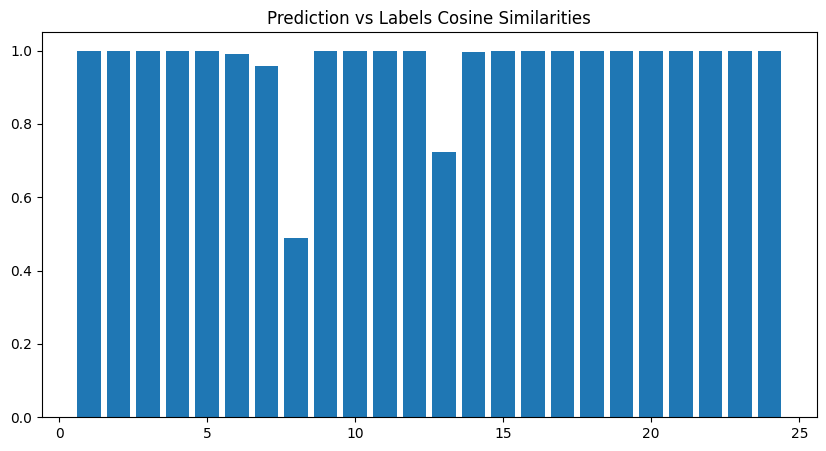

In [ ]:
from matplotlib import pyplot as plt
classes = [i for i in range(1,25)]
fig = plt.figure(figsize =(10, 5))
plt.title("Prediction vs Labels Cosine Similarities")
plt.bar(classes, Cos_sim_stacked.tolist())
plt.show()

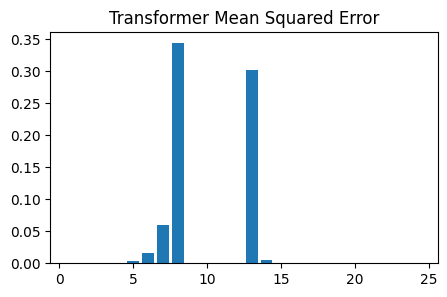

In [ ]:
All_losses_stacked = torch.stack(All_losses).mean(0)
from matplotlib import pyplot as plt
classes = [i for i in range(1,25)]
fig = plt.figure(figsize =(5, 3))
plt.title("Transformer Mean Squared Error")
plt.bar(classes, All_losses_stacked.tolist())
plt.show()

In [ ]:
print(f"Class Class_Name Mean Squared Error \n")
i = 1
for loss in All_losses_stacked.tolist():
  print(f"{i} {numeric_columns[i-1]} {loss}")
  i += 1

Class Class_Name Mean Squared Error 

1 tempC 3.04891338181781e-06
2 tempF 2.1885052095540567e-05
3 windspeedMiles 1.4944081849960435e-05
4 windspeedKmph 3.0115248567097083e-05
5 winddirdegree 0.003573143454155999
6 weatherCode 0.015577569900104388
7 precipMM 0.05928293870358821
8 precipInches 0.34352585804611396
9 humidity 0.0009452924239599226
10 visibilityKm 1.241796926254097e-05
11 visibilityMiles 2.571877597586953e-05
12 pressureMB 0.00010960095188478006
13 pressureInches 0.3025184379399319
14 cloudcover 0.005870842672911044
15 HeatIndexC 2.547602451150253e-06
16 HeatIndexF 2.9678067687124466e-05
17 DewPointC 9.05734189854024e-06
18 DewPointF 1.411370064556093e-05
19 WindChillC 1.980433118596323e-05
20 WindChillF 1.1204940705664803e-05
21 WindGustMiles 2.6248226523328774e-05
22 WindGustKmph 2.2747407488001645e-05
23 FeelsLikeC 5.986521737270199e-06
24 FeelsLikeF 3.4432474864740937e-06


In [ ]:
RMSE_losses_stacked = torch.stack(RMSE_losses).mean(0)
i = 1
print(f"Class RMSE Error \n")

for loss in RMSE_losses_stacked.tolist():
  print(f"{i} {loss}")
  i += 1


Class RMSE Error 

1 0.0017110910651920328
2 0.0044311062710779454
3 0.003742978527302473
4 0.005329693678144114
5 0.058420007340444995
6 0.12317903531975088
7 0.24047470351668043
8 0.5822780049147233
9 0.03056394018306979
10 0.003440623390302681
11 0.004882394298372661
12 0.01024353563381303
13 0.5478050535474978
14 0.07585752567726016
15 0.0014597361668838092
16 0.005147609217195413
17 0.0028671582944742565
18 0.003509641225623573
19 0.004341050407678228
20 0.0032512951562159646
21 0.004902949226433969
22 0.004454269665938982
23 0.0023420520871909657
24 0.001811864832612432


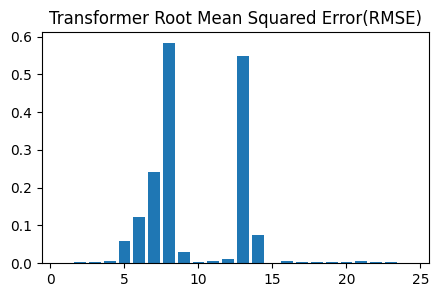

In [ ]:

from matplotlib import pyplot as plt
classes = [i for i in range(1,25)]
fig = plt.figure(figsize =(5, 3))
plt.title("Transformer Root Mean Squared Error(RMSE)")
plt.bar(classes, RMSE_losses_stacked.tolist())
plt.show()

In [ ]:
from torch import nn
class DetectorRNN(nn.Module):
    def __init__(self,no_layers,hidden_dim,embedding_dim,drop_prob=0.5):
        super(DetectorRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        # self.vocab_size = vocab_size

        # self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        # self.sig = nn.Softmax(dim=)

    def forward(self,x,hidden):
        batch_size = x.size(0)

        lstm_out, hidden = self.lstm(x, hidden)

        out = self.dropout(lstm_out)
        sig_out = self.fc(out)


        sig_out = sig_out[:, -1] # get last batch of labels

        return sig_out, hidden

    def init_hidden(self, batch_size):
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [ ]:
no_layers = 1
embedding_dim = 64
output_dim = 24
hidden_dim = 200

In [ ]:
Detector_model = DetectorRNN(1,hidden_dim,embedding_dim,drop_prob=0.1).to(device)

In [ ]:
optimizer = torch.optim.Adam(Detector_model.parameters(),lr=1e-5)

In [ ]:

epoch = 100
Detector_model.train()
Total_loss = 0
h = Detector_model.init_hidden(32)
clip = 5

for e in range(epoch):
  i = 0
  for _ in range(40):
    batch, labels = get_batch(32, chunk="train")
    h = tuple([each.data for each in h])
    Detector_model.zero_grad()
    preds,h = Detector_model(batch.to(device),h)
    loss = criterion(preds, labels.to(device).float())
    Total_loss += loss.item()
    loss.backward()
    nn.utils.clip_grad_norm_(Detector_model.parameters(), clip)
    optimizer.step()
    i += 1
    if(i % 20 == 0):
      print(f"[~] Epoch = {e+1} itteration = {i} Train_loss = {Total_loss/20}")
      Total_loss = 0


[~] Epoch = 1 itteration = 20 Train_loss = 0.9056836903095246
[~] Epoch = 1 itteration = 40 Train_loss = 0.8920697063207627
[~] Epoch = 2 itteration = 20 Train_loss = 0.8751407593488694
[~] Epoch = 2 itteration = 40 Train_loss = 0.8587924897670746
[~] Epoch = 3 itteration = 20 Train_loss = 0.8410407453775406
[~] Epoch = 3 itteration = 40 Train_loss = 0.822405281662941
[~] Epoch = 4 itteration = 20 Train_loss = 0.8034751176834106
[~] Epoch = 4 itteration = 40 Train_loss = 0.7809128642082215
[~] Epoch = 5 itteration = 20 Train_loss = 0.7576390147209168
[~] Epoch = 5 itteration = 40 Train_loss = 0.7320835828781128
[~] Epoch = 6 itteration = 20 Train_loss = 0.6948621720075607
[~] Epoch = 6 itteration = 40 Train_loss = 0.6523719698190689
[~] Epoch = 7 itteration = 20 Train_loss = 0.6103440999984742
[~] Epoch = 7 itteration = 40 Train_loss = 0.5411212801933288
[~] Epoch = 8 itteration = 20 Train_loss = 0.4597389161586761
[~] Epoch = 8 itteration = 40 Train_loss = 0.3572156339883804
[~] Epoch

In [ ]:
i = 0
Total_loss = 0
MSE_LOSSES = []
All_losses = []
RMSE_losses = []
for _ in range(100):
  batch, labels = get_batch(32, chunk="test")
  h = tuple([each.data for each in h])
  Detector_model.zero_grad()
  preds,h = Detector_model(batch.to(device),h)
  loss = criterion(preds, labels.to(device).float())
  Total_loss += loss.item()
  preds_transposed = preds.transpose(1,0)
  labels_transposed = labels.transpose(1,0)
  All_losses.append(get_mse_values(preds_transposed, labels_transposed))
  RMSE_losses.append(get_rmse_values(preds_transposed, labels_transposed))
  MSE_LOSSES.append(torch.cosine_similarity(preds_transposed,labels_transposed.to(device)))
  i += 1
  if(i % 20 == 0):
    print(f"[~] Epoch = {e+1} itteration = {i} Train_loss = {Total_loss/20}")
    Total_loss = 0

[~] Epoch = 100 itteration = 20 Train_loss = 0.047680171020328996
[~] Epoch = 100 itteration = 40 Train_loss = 0.04727053456008434
[~] Epoch = 100 itteration = 60 Train_loss = 0.04769229516386986
[~] Epoch = 100 itteration = 80 Train_loss = 0.04719427581876516
[~] Epoch = 100 itteration = 100 Train_loss = 0.04793012849986553


In [ ]:
Cos_sim_stacked = torch.stack(MSE_LOSSES).mean(0)
i = 1
print(f"Class Class_Name Cosine Similarities \n")
for loss in Cos_sim_stacked.tolist():
  print(f"{i} {numeric_columns[i-1]} {loss}")
  i += 1

Class Class_Name Cosine Similarities 

1 tempC 0.9937220872975817
2 tempF 0.9929331074999102
3 windspeedMiles 0.9930734693563159
4 windspeedKmph 0.993601455341048
5 winddirdegree 0.9916877834769737
6 weatherCode 0.9866735908335978
7 precipMM 0.9481246065447991
8 precipInches 0.4518782437563739
9 humidity 0.9924133359596078
10 visibilityKm 0.9923273705478113
11 visibilityMiles 0.9933301686462994
12 pressureMB 0.9931004378786418
13 pressureInches 0.6154243430390498
14 cloudcover 0.9906663865738494
15 HeatIndexC 0.9932564407690521
16 HeatIndexF 0.9928594078568818
17 DewPointC 0.9929788187777336
18 DewPointF 0.9927565928869616
19 WindChillC 0.9934578295603815
20 WindChillF 0.9937167373346826
21 WindGustMiles 0.9933247911265011
22 WindGustKmph 0.9936673728753976
23 FeelsLikeC 0.9929533681487673
24 FeelsLikeF 0.9924628877562852


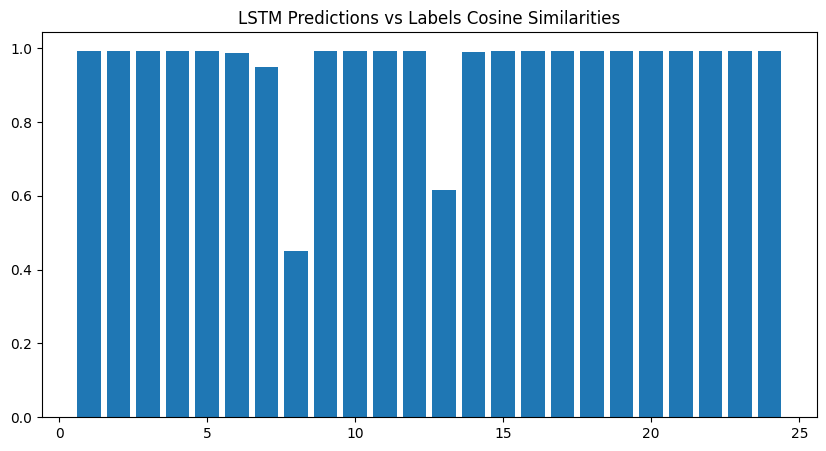

In [ ]:
from matplotlib import pyplot as plt
classes = [i for i in range(1,25)]
fig = plt.figure(figsize =(10, 5))
plt.title("LSTM Predictions vs Labels Cosine Similarities")
plt.bar(classes, Cos_sim_stacked.tolist())
plt.show()

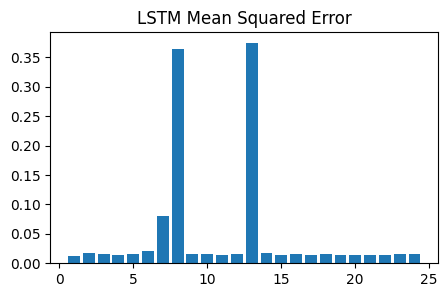

In [ ]:
All_losses_stacked = torch.stack(All_losses).mean(0)
from matplotlib import pyplot as plt
classes = [i for i in range(1,25)]
fig = plt.figure(figsize =(5, 3))
plt.title("LSTM Mean Squared Error")
plt.bar(classes, All_losses_stacked.tolist())
plt.show()

In [ ]:
print(f"Class Class_Name Mean Squared Error \n")
i = 1
for loss in All_losses_stacked.tolist():
  print(f"{i} {numeric_columns[i-1]} {loss}")
  i += 1

Class Class_Name Mean Squared Error 

1 tempC 0.01294600564067717
2 tempF 0.017354298927837103
3 windspeedMiles 0.015358887569557502
4 windspeedKmph 0.013434619270635974
5 winddirdegree 0.01620956583750105
6 weatherCode 0.02041894682427654
7 precipMM 0.08035691307664634
8 precipInches 0.3647792541766096
9 humidity 0.01660978354309757
10 visibilityKm 0.016134823428548703
11 visibilityMiles 0.01487260239507163
12 pressureMB 0.015005612710754082
13 pressureInches 0.37388356672644724
14 cloudcover 0.016825245566989718
15 HeatIndexC 0.014836183756161638
16 HeatIndexF 0.015249978637183892
17 DewPointC 0.01445194847588941
18 DewPointF 0.015481006474579626
19 WindChillC 0.013938739243326791
20 WindChillF 0.01329021623179118
21 WindGustMiles 0.01407935469043068
22 WindGustKmph 0.01409089683295258
23 FeelsLikeC 0.015319289416584088
24 FeelsLikeF 0.016355782340353092


In [ ]:
RMSE_losses_stacked = torch.stack(RMSE_losses).mean(0)
i = 1
print(f"Class RMSE Error \n")

for loss in RMSE_losses_stacked.tolist():
  print(f"{i} {loss}")
  i += 1

Class RMSE Error 

1 0.11315906639881941
2 0.1308974873779898
3 0.12302221026928108
4 0.11522411282570764
5 0.1262845384813695
6 0.14183513671715797
7 0.2811194186458707
8 0.6027810634461435
9 0.12794452149659238
10 0.12579172553923257
11 0.12117377216927397
12 0.12168945740708427
13 0.6096040728728752
14 0.12883815146716013
15 0.12097149904955601
16 0.12241462400529204
17 0.1192225278828829
18 0.12350916599732235
19 0.11712641897809459
20 0.11448422520262092
21 0.1178397857021139
22 0.11765097663942736
23 0.12271019143024592
24 0.12683709849323566


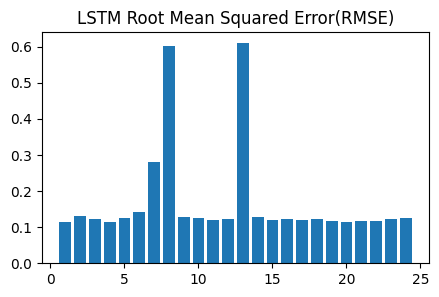

In [ ]:
from matplotlib import pyplot as plt
classes = [i for i in range(1,25)]
fig = plt.figure(figsize =(5, 3))
plt.title("LSTM Root Mean Squared Error(RMSE)")
plt.bar(classes, RMSE_losses_stacked.tolist())
plt.show()